# <center> <img src="../../img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
## <center> Computer Systems Engineering  </center>
---
### <center> Big Data Processing </center>
---
#### <center> **Autumn 2025** </center>
---

**Lab 04**: Data Unions & Joins Pipeline

**Date**: September 23rd 2025

**Student Name**:

**Professor**: Pablo Camarillo Ramirez

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Examples on SparkSQL") \
    .master("spark://d89a1b7dddc8:7077") \
    .config("spark.ui.port", "4040") \
    .getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("ERROR")

In [2]:
# Build schema
# Import your module
from eduardo_navarro.spark_utils import SparkUtils
from pyspark.sql.functions import get_json_object

schema_agencies = SparkUtils.generate_schema([("agency_id", "int"), ("agency_info", "string")])

df_agencies = spark.read.schema(schema_agencies).option("header", True).csv("/opt/spark/work-dir/data/car_service/agencies")


In [3]:
df_agencies = df_agencies.withColumn("agency_name", get_json_object(df_agencies.agency_info, "$.agency_name"))


In [4]:
schema_rentals = SparkUtils.generate_schema([("rental_id", "int"), ("rental_info", "string")])
df_rentals = spark.read.schema(schema_rentals).option("header", True).csv("/opt/spark/work-dir/data/car_service/rentals")

df_rentals = df_rentals.withColumn("car_id", get_json_object(df_rentals.rental_info, "$.car_id"))
df_rentals = df_rentals.withColumn("customer_id", get_json_object(df_rentals.rental_info, "$.customer_id"))
df_rentals = df_rentals.withColumn("agency_id", get_json_object(df_rentals.rental_info, "$.agency_id"))




In [5]:
schema_customers = SparkUtils.generate_schema([("customer_id", "int"), ("customer_info", "string")])
df_customers = spark.read.schema(schema_customers).option("header", True).csv("/opt/spark/work-dir/data/car_service/customers")  
df_customers = df_customers.withColumn("customer_name", get_json_object(df_customers.customer_info, "$.customer_name"))  


In [6]:
schema_cars = SparkUtils.generate_schema([("car_id", "int"), ("car_info", "string")])

df_cars = spark.read.schema(schema_cars).option("header", True).csv("/opt/spark/work-dir/data/car_service/cars")

df_cars = df_cars.withColumn("car_name", get_json_object(df_cars.car_info, "$.car_name"))


In [7]:
df_final = df_rentals\
    .join(df_cars, on = "car_id")\
    .join(df_agencies, on = "agency_id")\
    .join(df_customers, on = "customer_id")\
    .select("rental_id", "car_name", "agency_name", "customer_name")
df_final.show(5)

+---------+--------------------+-------------+---------------+
|rental_id|            car_name|  agency_name|  customer_name|
+---------+--------------------+-------------+---------------+
|    11891|Wallace-Carlson M...|  NYC Rentals| Margaret Jones|
|    11892|Grimes-Green Model 8|LA Car Rental|Albert Williams|
|    11893|Stewart-Allen Mod...|      SF Cars|  Caleb Fleming|
|    11894|  Campos PLC Model 4|  NYC Rentals|  Andrew Butler|
|    11895|  Wagner LLC Model 1|      SF Cars|  Kristin Potts|
+---------+--------------------+-------------+---------------+
only showing top 5 rows


In [8]:
!pwd

/opt/spark/work-dir/labs/lab04


In [9]:
!du -sh /opt/spark/work-dir/data/car_service/rentals/

1.1M	/opt/spark/work-dir/data/car_service/rentals/


In [12]:
base_path = "/opt/spark/work-dir/data/"
df_final.write \
        .partitionBy("agency_name")\
        .mode("overwrite")\
        .parquet(base_path + "car_service/output/parquet")

In [14]:
df_final.write\
        .partitionBy("agency_name")\
        .mode("overwrite")\
        .option("heather", True)\
        .csv(base_path + "car_service/output/csv")





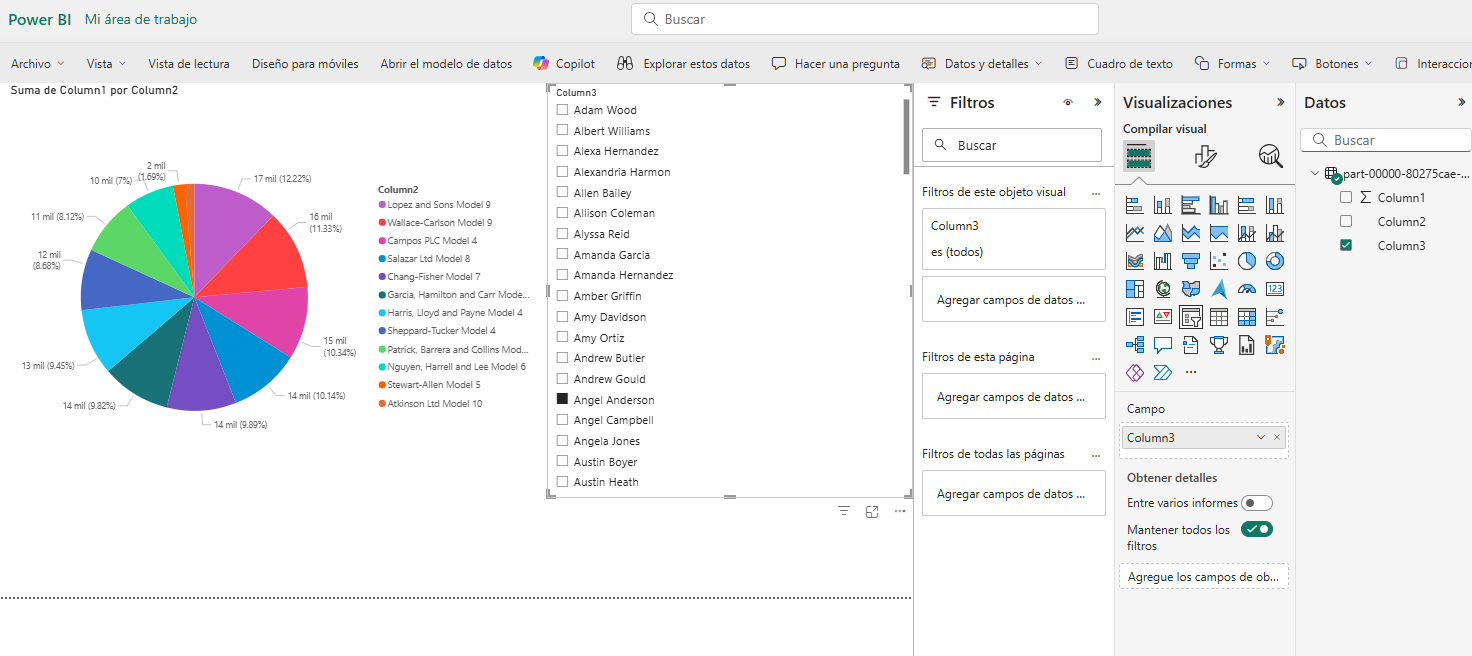






In [15]:
sc.stop()










